<a href="https://colab.research.google.com/github/atlas-github/nih_time_series_nlp/blob/main/nih_time_series_nlp_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 09:00 am: Feature engineering for time series data

### Creating Lag Features
Lag features are previous values of the time series that can help capture temporal dependencies.

In [ ]:
import pandas as pd

# Sample data
data = {
    'date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'value': [10, 12, 15, 14, 16, 18, 20, 22, 21, 23]
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# create lag features
# refer to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html
df['lag_1'] = df['value'].shift(1)
df['lag_2'] = df['value'].shift(2)

print(df)

            value  lag_1  lag_2
date                           
2024-01-01     10    NaN    NaN
2024-01-02     12   10.0    NaN
2024-01-03     15   12.0   10.0
2024-01-04     14   15.0   12.0
2024-01-05     16   14.0   15.0
2024-01-06     18   16.0   14.0
2024-01-07     20   18.0   16.0
2024-01-08     22   20.0   18.0
2024-01-09     21   22.0   20.0
2024-01-10     23   21.0   22.0


### Rolling Statistics (Moving Average)

Rolling statistics help in smoothing the time series data and identifying trends.

In [ ]:
# moving average with a window of 3 days
# refer to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
df['moving_avg_3'] = df['value'].rolling(window=3).mean()

df

,value,lag_1,lag_2,moving_avg_3
date,,,,
2024-01-01,10,NaN,NaN,NaN
2024-01-02,12,10.0,NaN,NaN
2024-01-03,15,12.0,10.0,12.333333
2024-01-04,14,15.0,12.0,13.666667
2024-01-05,16,14.0,15.0,15.000000
2024-01-06,18,16.0,14.0,16.000000
2024-01-07,20,18.0,16.0,18.000000
2024-01-08,22,20.0,18.0,20.000000
2024-01-09,21,22.0,20.0,21.000000


### Fourier Transform
Fourier Transform helps in analyzing the frequency components of the time series.

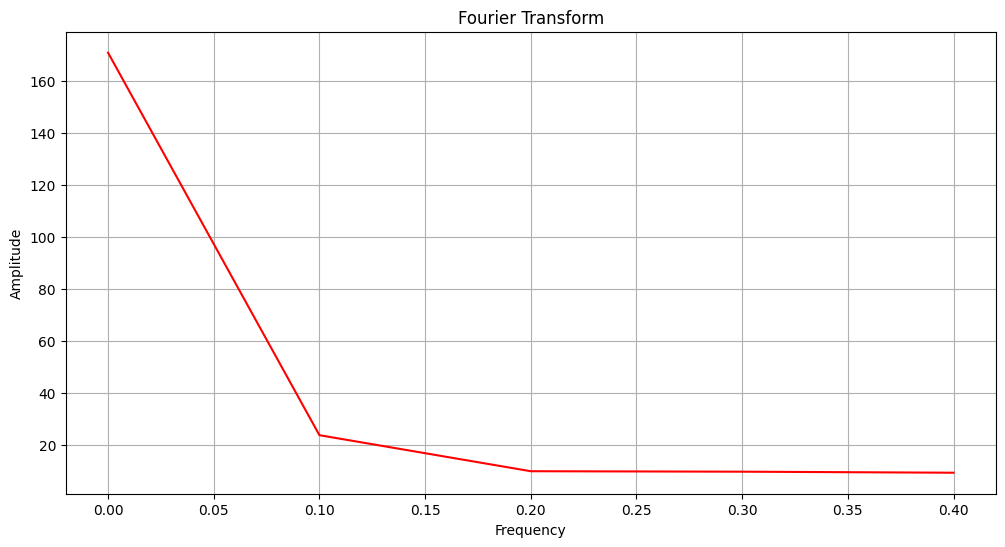

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate sample data
# refer to https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html
n = len(df)
f_values = np.fft.fft(df['value'].dropna())
frequencies = np.fft.fftfreq(n)

# plot the Fourier Transform
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:n//2], np.abs(f_values[:n//2]), 'r-')
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


### Exponential Moving Average

The Exponential Moving Average (EMA) gives more weight to recent observations.

In [ ]:
# exponential moving average with a span of 3 days
# refer to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html
df['ema_3'] = df['value'].ewm(span=3, adjust=False).mean()

print(df)

            value  lag_1  lag_2  moving_avg_3      ema_3
date                                                    
2024-01-01     10    NaN    NaN           NaN  10.000000
2024-01-02     12   10.0    NaN           NaN  11.000000
2024-01-03     15   12.0   10.0     12.333333  13.000000
2024-01-04     14   15.0   12.0     13.666667  13.500000
2024-01-05     16   14.0   15.0     15.000000  14.750000
2024-01-06     18   16.0   14.0     16.000000  16.375000
2024-01-07     20   18.0   16.0     18.000000  18.187500
2024-01-08     22   20.0   18.0     20.000000  20.093750
2024-01-09     21   22.0   20.0     21.000000  20.546875
2024-01-10     23   21.0   22.0     22.000000  21.773438


## 09:45 am: Time series data normalization and scaling

### Normalization
Normalization (or Min-Max Scaling) scales the data to a fixed range, usually [0, 1].

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = {
    'date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'value': [10, 12, 15, 14, 16, 18, 20, 22, 21, 23]
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# normalizing
# refer to https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler()
df['normalized'] = scaler.fit_transform(df[['value']])

print(df)


            value  normalized
date                         
2024-01-01     10    0.000000
2024-01-02     12    0.153846
2024-01-03     15    0.384615
2024-01-04     14    0.307692
2024-01-05     16    0.461538
2024-01-06     18    0.615385
2024-01-07     20    0.769231
2024-01-08     22    0.923077
2024-01-09     21    0.846154
2024-01-10     23    1.000000


### Standardization
Standardization (or Z-score normalization) scales the data so that it has a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardizing
# refer to https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
df['standardized'] = scaler.fit_transform(df[['value']])

print(df)

            value  normalized  standardized
date                                       
2024-01-01     10    0.000000     -1.697710
2024-01-02     12    0.153846     -1.219482
2024-01-03     15    0.384615     -0.502140
2024-01-04     14    0.307692     -0.741254
2024-01-05     16    0.461538     -0.263025
2024-01-06     18    0.615385      0.215203
2024-01-07     20    0.769231      0.693431
2024-01-08     22    0.923077      1.171659
2024-01-09     21    0.846154      0.932545
2024-01-10     23    1.000000      1.410773


### Effects of Scaling on Time Series Analysis
Scaling can impact time series models and their predictions. Let’s compare how normalization and standardization affect a simple moving average.

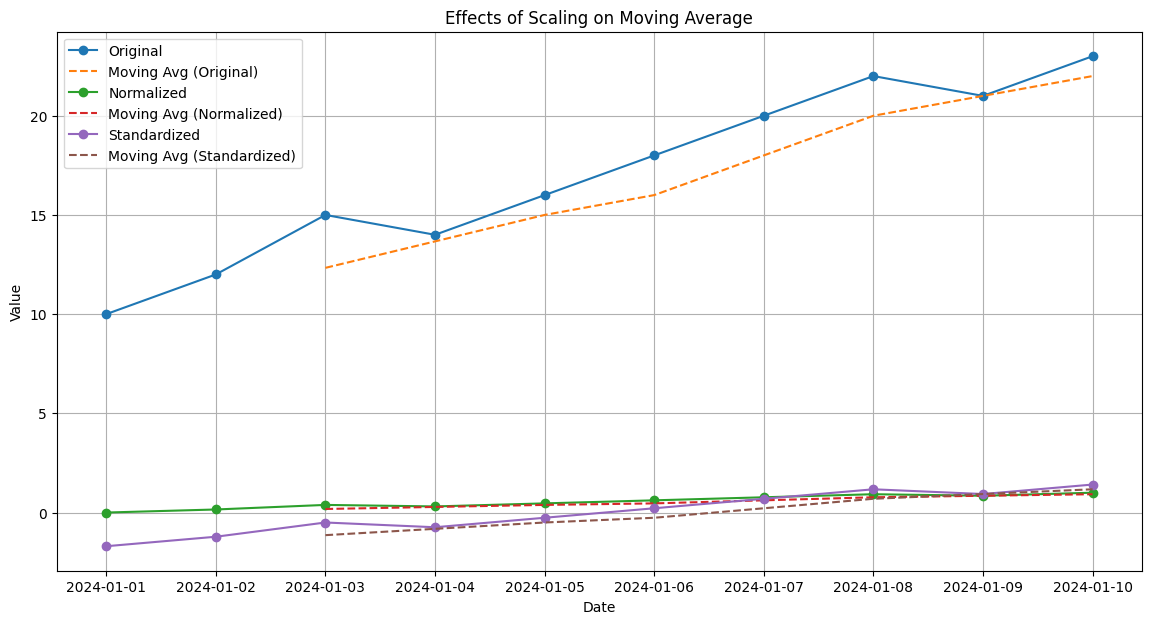

In [ ]:
import matplotlib.pyplot as plt

# compute moving averages before scaling
df['moving_avg_3'] = df['value'].rolling(window=3).mean()

# compute moving averages after normalization
df['normalized_moving_avg_3'] = df['normalized'].rolling(window=3).mean()

# compute moving averages after standardization
df['standardized_moving_avg_3'] = df['standardized'].rolling(window=3).mean()

# plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['value'], label='Original', marker='o')
plt.plot(df.index, df['moving_avg_3'], label='Moving Avg (Original)', linestyle='--')

plt.plot(df.index, df['normalized'], label='Normalized', marker='o')
plt.plot(df.index, df['normalized_moving_avg_3'], label='Moving Avg (Normalized)', linestyle='--')

plt.plot(df.index, df['standardized'], label='Standardized', marker='o')
plt.plot(df.index, df['standardized_moving_avg_3'], label='Moving Avg (Standardized)', linestyle='--')

plt.title('Effects of Scaling on Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## 11:00 am: Practical session 4


In [ ]:
#install the gdown library
!pip install gdown

In [ ]:
#download dengue csv
import pandas as pd
import gdown

# insert file_id
file_id = '1F-faNnQoyhdjbuyEVZPHV1cv_h0h5UDl'
url = f'https://drive.google.com/uc?id={file_id}'

# download the CSV file
gdown.download(url, 'dengue.csv', quiet=False)

# read the csv file into a DataFrame
df_dengue = pd.read_csv('dengue.csv')
df_dengue

Downloading...
From (original): https://drive.google.com/uc?id=1F-faNnQoyhdjbuyEVZPHV1cv_h0h5UDl
From (redirected): https://drive.google.com/uc?id=1F-faNnQoyhdjbuyEVZPHV1cv_h0h5UDl&confirm=t&uuid=db94baef-3518-4b31-86cd-85af511036e1
To: /content/dengue.csv
100%|██████████| 168M/168M [00:05<00:00, 31.8MB/s]
<ipython-input-42-2477963ea8a9>:13: DtypeWarning: Columns (22,55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dengue = pd.read_csv('dengue.csv')


,OBJECTID,NO_KES,TRK_NOTI,TRK_DAFTAR,STATUS_XY,RUNSISDATE,OBJECTID_1,NO_NOTI,NO_KES_1,TRK_ONSET,...,TRK_RAWATA,TRK_DIAGNO,TPT_RAWATA,TRK_PTP,TRK_SRT,TRK_ULV,STATUS_PEN,STATUS_LOK,UJIAN_RAPI,RUNSISDA_1
0,1,2016/246923,2014/12/22,2014/12/28,Dalam Sempadan,2022/09/09,192,2221161,2016/246923,2014/12/19,...,NaN,2014/12/22,KLINIK KERAJAAN,NaN,NaN,NaN,Pihak Berkuasa Tempatan,Bandar,TIADA,2022/08/19
1,2,2016/247869,2014/12/20,2014/12/28,Dalam Sempadan,2022/09/09,129,2218637,2016/247869,2014/12/16,...,2014/12/20,2014/12/20,WAD - HOSPITAL KERAJAAN,2014/12/24,2014/12/23,2014/12/23,KKM,Luar Bandar,TIADA,2022/08/19
2,3,2016/247870,2014/12/22,2014/12/28,Dalam Sempadan,2022/09/09,113,2219970,2016/247870,2014/12/20,...,2014/12/21,2014/12/22,WAD - HOSPITAL KERAJAAN,2014/12/24,2014/12/23,2014/12/23,KKM,Luar Bandar,TIADA,2022/08/19
3,6,2016/248203,2014/12/25,2014/12/28,Dalam Sempadan,2022/09/09,161,2224608,2016/248203,2014/12/15,...,2014/12/15,2014/12/25,WAD - HOSPITAL KERAJAAN,NaN,NaN,NaN,Pihak Berkuasa Tempatan,Bandar,TIADA,2022/08/19
4,7,2016/248205,2014/12/25,2014/12/28,Dalam Sempadan,2022/09/09,18,2224730,2016/248205,2014/12/19,...,2014/12/23,2014/12/23,JABATAN KECEMASAN & TRAUMA (A&E) - HOSPITAL KE...,NaN,NaN,NaN,Pihak Berkuasa Tempatan,Bandar,TIADA,2022/08/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294003,527065,2022/3556,2022/02/03,2022/02/04,Dalam Sempadan,2022/09/09,546394,7700384,2022/3556,2022/01/30,...,NaN,2022/02/03,KLINIK KERAJAAN,2022/02/07,NaN,NaN,Pihak Berkuasa Tempatan,Bandar,"NS1 Positif, IgG Negatif, IgM Negatif",2022/08/29
294004,527066,2022/3557,2022/02/02,2022/02/04,Dalam Sempadan,2022/09/09,546432,7699146,2022/3557,2022/01/31,...,2022/02/02,2022/02/02,JABATAN KECEMASAN & TRAUMA (A&E) - HOSPITAL SW...,2022/02/07,NaN,NaN,Pihak Berkuasa Tempatan,Bandar,IgG Positif,2022/08/29
294005,527067,2022/3560,2022/02/03,2022/02/04,Dalam Sempadan,2022/09/09,546406,7693895,2022/3560,2022/02/02,...,2022/02/02,2022/02/03,JABATAN KECEMASAN & TRAUMA (A&E) - HOSPITAL SW...,NaN,NaN,NaN,Pihak Berkuasa Tempatan,Bandar,NS1 Positif,2022/08/29
294006,527068,2022/3561,2022/02/03,2022/02/04,Dalam Sempadan,2022/09/09,546437,7698916,2022/3561,2022/01/31,...,NaN,2022/02/03,KLINIK KERAJAAN,2022/02/05,NaN,NaN,Pihak Berkuasa Tempatan,Bandar,IgG Positif,2022/08/29


In [ ]:
# filter to only needed columns
df_dengue_filtered = df_dengue[["NO_KES", "TRK_NOTI", "EPID_MINGG", "EPID_TAHUN", "JNS_KES", "NO_RUMAH",
                                "POSKOD", "LOKALITI", "MUKIM", "DAERAH", "NEGERI", "LATITUDE", "LONGITUDE", "PENTADBIRA",
                                "WARGANEGAR", "STATUS_PEN", "STATUS_LOK"]]
# convert to datetime
df_dengue_filtered['TRK_NOTI'] = pd.to_datetime(df_dengue_filtered['TRK_NOTI'], format = "%Y/%m/%d")

# which postcodes have most complete vs. most missing data?
postcode_counts = df_dengue_filtered['POSKOD'].value_counts().reset_index()

# rename the columns
postcode_counts.columns = ['postcode', 'count']

postcode_counts

<ipython-input-43-e1a520a31cc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue_filtered['TRK_NOTI'] = pd.to_datetime(df_dengue_filtered['TRK_NOTI'], format = "%Y/%m/%d")


,postcode,count
0,43000.0,22665
1,68000.0,13900
2,43300.0,11192
3,41200.0,10018
4,43200.0,9536
...,...,...
1098,45950.0,1
1099,57600.0,1
1100,83700.0,1
1101,45320.0,1


In [ ]:
# filter to only postcode 47620
df_dengue_47620 = df_dengue_filtered[df_dengue_filtered["POSKOD"] == 47620]
df_dengue_47620

,NO_KES,TRK_NOTI,EPID_MINGG,EPID_TAHUN,JNS_KES,NO_RUMAH,POSKOD,LOKALITI,MUKIM,DAERAH,NEGERI,LATITUDE,LONGITUDE,PENTADBIRA,WARGANEGAR,STATUS_PEN,STATUS_LOK
29,2016/248630,2014-12-26,52,2014,Wabak,NO 10,47620.0,USJ 11/2,PETALING,PETALING,SELANGOR,3.04272,101.581,PKD PETALING,Warganegara,Pihak Berkuasa Tempatan,Bandar
32,2016/248638,2014-12-25,52,2014,Wabak,NO 28,47620.0,USJ 11/2,PETALING,PETALING,SELANGOR,3.04020,101.582,PKD PETALING,Warganegara,Pihak Berkuasa Tempatan,Bandar
267,2016/249388,2014-12-28,52,2014,Wabak,"RITMA EFEKTIF S/B,",47620.0,USJ 9/5,PETALING,PETALING,SELANGOR,3.04671,101.586,PKD PETALING,Bukan Warganegara,Pihak Berkuasa Tempatan,Bandar
457,2016/249800,2014-12-28,52,2014,Wabak,JLN USJ 1/1C,47620.0,USJ 1/1,PETALING,PETALING,SELANGOR,3.05628,101.605,PKD PETALING,Bukan Warganegara,Pihak Berkuasa Tempatan,Bandar
472,2016/249832,2014-12-28,52,2014,Wabak,"NO 8,",47620.0,USJ 1 (JLN USJ 1/20-1/28),PETALING,PETALING,SELANGOR,3.05658,101.600,PKD PETALING,Warganegara,Pihak Berkuasa Tempatan,Bandar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292345,2022/1037,2022-01-10,1,2022,Wabak,"NO 15, JALAN USJ 11/1H, SUBANG JAYA, SELANGOR ...",47620.0,E13. USJ 11/1,7. DAMANSARA (MBSJ),PETALING,SELANGOR,3.04582,101.578,PKD PETALING,Warganegara,Pihak Berkuasa Tempatan,Bandar
292541,2022/1341,2022-01-12,2,2022,Satu Kes,D-13-2 USJ 11/7 SRI BAYU CONDO SUBANG JAYA,47620.0,E13. USJ 11 (SRI BAYU CONDO),7. DAMANSARA (MBSJ),PETALING,SELANGOR,3.04237,101.580,PKD PETALING,Warganegara,Pihak Berkuasa Tempatan,Bandar
292896,2022/1905,2022-01-19,2,2022,Wabak,"NO 62,JALAN PINGGIRAN USJ 3/2",47620.0,E13. USJ 3/2,7. DAMANSARA (MBSJ),PETALING,SELANGOR,3.04846,101.559,PKD PETALING,Warganegara,KKM,Bandar
293872,2022/3368,2022-02-02,5,2022,Wabak,43 JLN USJ 2/5E SUBANG JAYA,47620.0,E13. USJ 2/5,7. DAMANSARA (MBSJ),PETALING,SELANGOR,3.06074,101.583,PKD PETALING,Warganegara,Pihak Berkuasa Tempatan,Bandar


In [ ]:
# reset index
df_dengue_47620.set_index('TRK_NOTI', inplace=True)

In [ ]:
# Create pivot table
pivot_table = df_dengue_47620.groupby([pd.Grouper(freq='W'), 'JNS_KES']).size().unstack(fill_value=0)
pivot_table

JNS_KES,Satu Kes,Wabak
TRK_NOTI,,
2014-12-28,0,6
2015-01-04,2,4
2015-01-11,1,4
2015-01-18,0,5
2015-01-25,0,4
...,...,...
2022-01-02,1,2
2022-01-09,2,2
2022-01-16,2,4


In [ ]:
# reset index to make 'date' a column again
pivot_table_long = pivot_table.reset_index()

# melt the DataFrame to long format
pivot_table_long = pivot_table_long.melt(id_vars='TRK_NOTI', var_name='case_type', value_name='case_count')

# extract the case type from the 'case_type' column
pivot_table_long['case_type'] = pivot_table_long['case_type'].str.replace('cases_', '')

pivot_table_long

,TRK_NOTI,case_type,case_count
0,2014-12-28,Satu Kes,0
1,2015-01-04,Satu Kes,2
2,2015-01-11,Satu Kes,1
3,2015-01-18,Satu Kes,0
4,2015-01-25,Satu Kes,0
...,...,...,...
487,2022-01-02,Wabak,2
488,2022-01-09,Wabak,2
489,2022-01-16,Wabak,4
490,2022-01-23,Wabak,1


In [ ]:
# filter to only wabak
pivot_table_wabak = pivot_table_long[pivot_table_long["case_type"] == "Wabak"]
pivot_table_wabak

,TRK_NOTI,case_type,case_count
246,2014-12-28,Wabak,6
247,2015-01-04,Wabak,4
248,2015-01-11,Wabak,4
249,2015-01-18,Wabak,5
250,2015-01-25,Wabak,4
...,...,...,...
487,2022-01-02,Wabak,2
488,2022-01-09,Wabak,2
489,2022-01-16,Wabak,4
490,2022-01-23,Wabak,1


In [ ]:
import pandas as pd

# sample data
pivot_table_wabak.set_index('TRK_NOTI', inplace=True)

# create lag features
pivot_table_wabak = pivot_table_wabak.copy()
pivot_table_wabak['lag_1'] = pivot_table_wabak['case_count'].shift(1)
pivot_table_wabak['lag_2'] = pivot_table_wabak['case_count'].shift(2)

pivot_table_wabak

,case_type,case_count,lag_1,lag_2
TRK_NOTI,,,,
2014-12-28,Wabak,6,NaN,NaN
2015-01-04,Wabak,4,6.0,NaN
2015-01-11,Wabak,4,4.0,6.0
2015-01-18,Wabak,5,4.0,4.0
2015-01-25,Wabak,4,5.0,4.0
...,...,...,...,...
2022-01-02,Wabak,2,3.0,3.0
2022-01-09,Wabak,2,2.0,3.0
2022-01-16,Wabak,4,2.0,2.0


In [ ]:
 # reset index
pivot_table_wabak = pivot_table_wabak.reset_index()
pivot_table_wabak

,TRK_NOTI,case_type,case_count,lag_1,lag_2
0,2014-12-28,Wabak,6,NaN,NaN
1,2015-01-04,Wabak,4,6.0,NaN
2,2015-01-11,Wabak,4,4.0,6.0
3,2015-01-18,Wabak,5,4.0,4.0
4,2015-01-25,Wabak,4,5.0,4.0
...,...,...,...,...,...
241,2022-01-02,Wabak,2,3.0,3.0
242,2022-01-09,Wabak,2,2.0,3.0
243,2022-01-16,Wabak,4,2.0,2.0
244,2022-01-23,Wabak,1,4.0,2.0


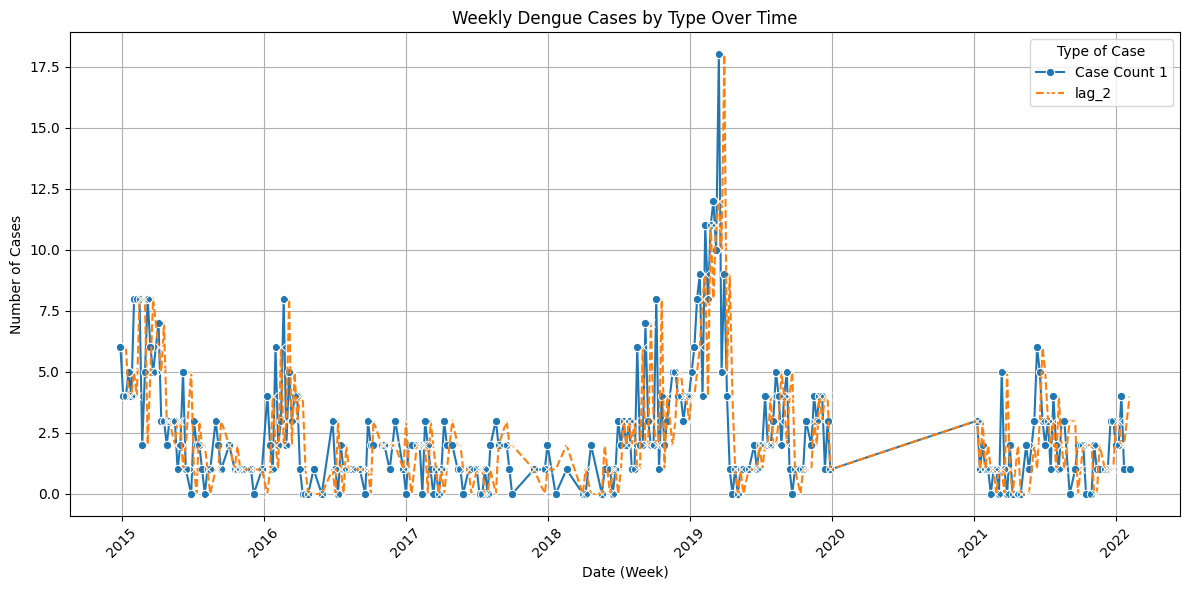

In [ ]:
# create the plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table_wabak, x='TRK_NOTI', y='case_count', marker='o', label='Case Count 1')
sns.lineplot(data=pivot_table_wabak, x='TRK_NOTI', y='lag_2', marker='x', linestyle='--', label='lag_2')

# customize the plot
plt.title('Weekly Dengue Cases by Type Over Time')
plt.xlabel('Date (Week)')
plt.ylabel('Number of Cases')
plt.grid(True)

plt.xticks(rotation=45)
plt.legend(title='Type of Case')
plt.tight_layout()

# show the plot
plt.show()

In [ ]:
# retrieve external data example: https://open-meteo.com/en/docs/historical-weather-api#start_date=2014-12-28&end_date=2022-02-06&hourly=&daily=rain_sum&timezone=Asia%2FSingapore
df_open_meteo_47620 = pd.read_csv("open-meteo-3.06N101.60E38m.csv", skiprows = 2)
df_open_meteo_47620

,time,rain_sum (mm)
0,2014-12-28,10.1
1,2014-12-29,20.7
2,2014-12-30,5.9
3,2014-12-31,0.6
4,2015-01-01,5.1
...,...,...
2593,2022-02-02,1.2
2594,2022-02-03,4.1
2595,2022-02-04,6.4
2596,2022-02-05,11.9


In [ ]:
# convert to datetime
df_open_meteo_47620['time'] = pd.to_datetime(df_open_meteo_47620['time'], format = "%Y-%m-%d")

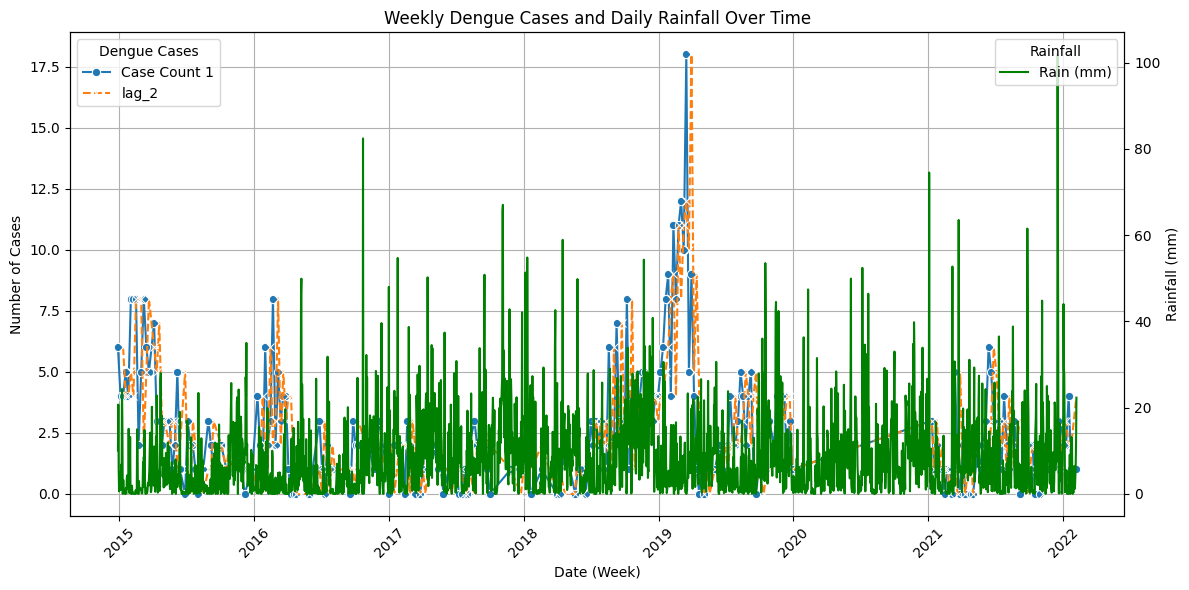

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create the main figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# first plot: Dengue case counts and lag_2 on the primary y-axis
sns.lineplot(data=pivot_table_wabak, x='TRK_NOTI', y='case_count', marker='o', label='Case Count 1', ax=ax1)
sns.lineplot(data=pivot_table_wabak, x='TRK_NOTI', y='lag_2', marker='x', linestyle='--', label='lag_2', ax=ax1)

# customize the first axis
ax1.set_title('Weekly Dengue Cases and Daily Rainfall Over Time')
ax1.set_xlabel('Date (Week)')
ax1.set_ylabel('Number of Cases')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Dengue Cases', loc='upper left')

# create a secondary y-axis for rainfall
ax2 = ax1.twinx()

# second plot: Daily rainfall on the secondary y-axis
sns.lineplot(data=df_open_meteo_47620, x='time', y='rain_sum (mm)', color='green', label='Rain (mm)', ax=ax2)

# customize the second axis
ax2.set_ylabel('Rainfall (mm)')
ax2.legend(title='Rainfall', loc='upper right')

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

## 12:00 pm: Time series decomposition

Time series decomposition is a useful technique for analyzing the components of a time series. It typically breaks down a time series into trend, seasonality, and residuals (or noise). There are two main types of decomposition: additive and multiplicative.

### Additive Decomposition
In additive decomposition, the time series is assumed to be the sum of the trend, seasonality, and residuals.

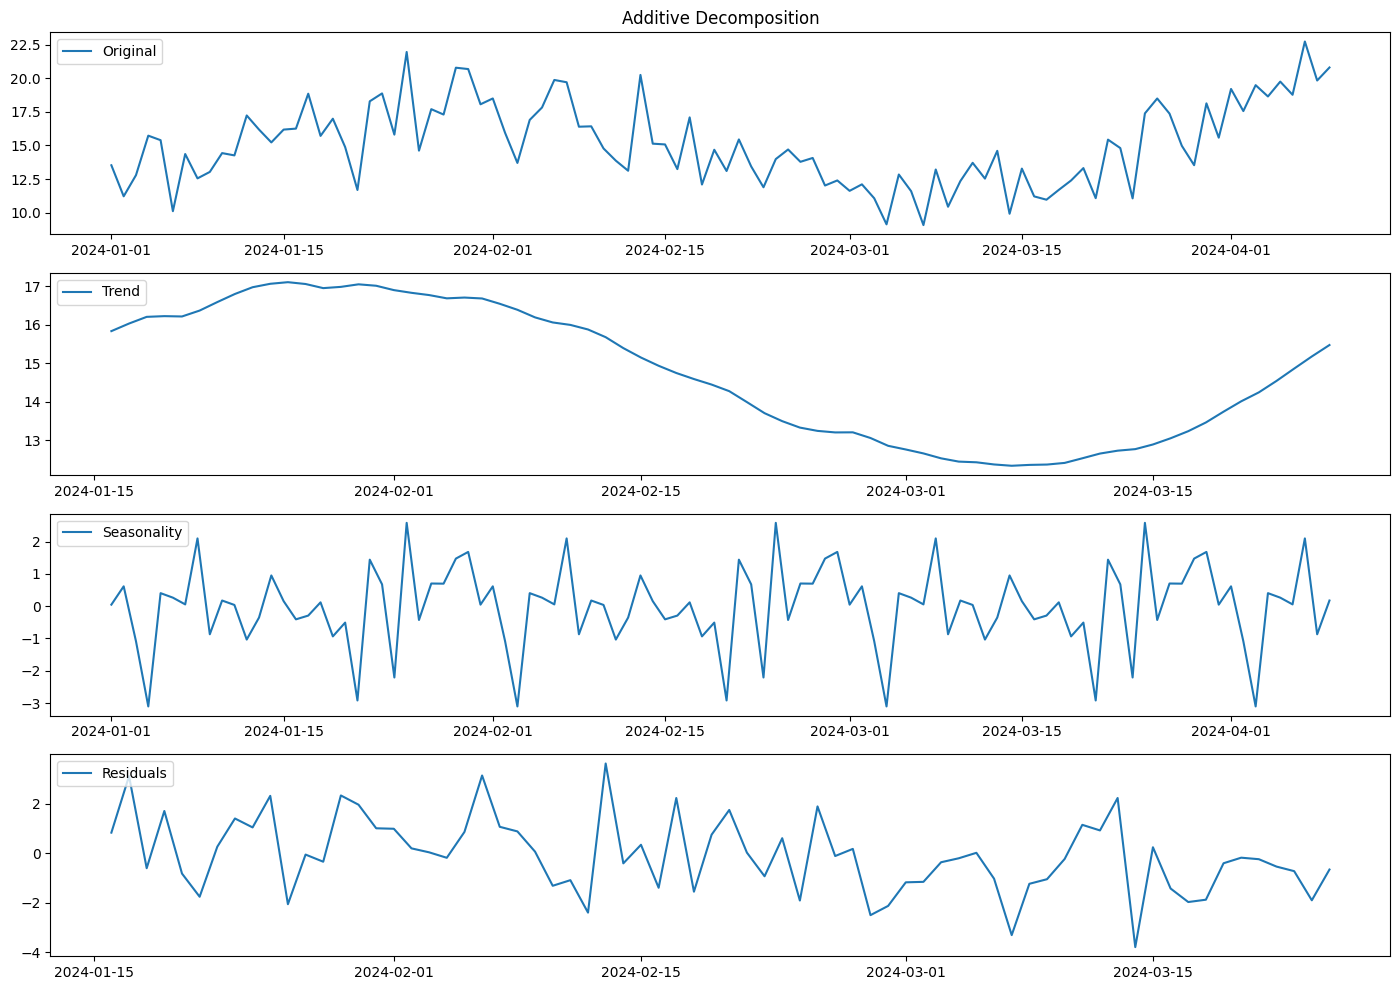

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# generate sample data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=100, freq='D')
trend = np.linspace(10, 20, 100)
seasonal = 5 * np.sin(np.linspace(0, 2 * np.pi, 100))
residual = np.random.normal(scale=2, size=100)
data = trend + seasonal + residual

# create DataFrame
df = pd.DataFrame(data, index=dates, columns=['value'])

# perform additive decomposition
decomposition = seasonal_decompose(df['value'], model='additive', period=30)

# plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df['value'], label='Original')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Multiplicative Decomposition
In multiplicative decomposition, the time series is assumed to be the product of the trend, seasonality, and residuals.

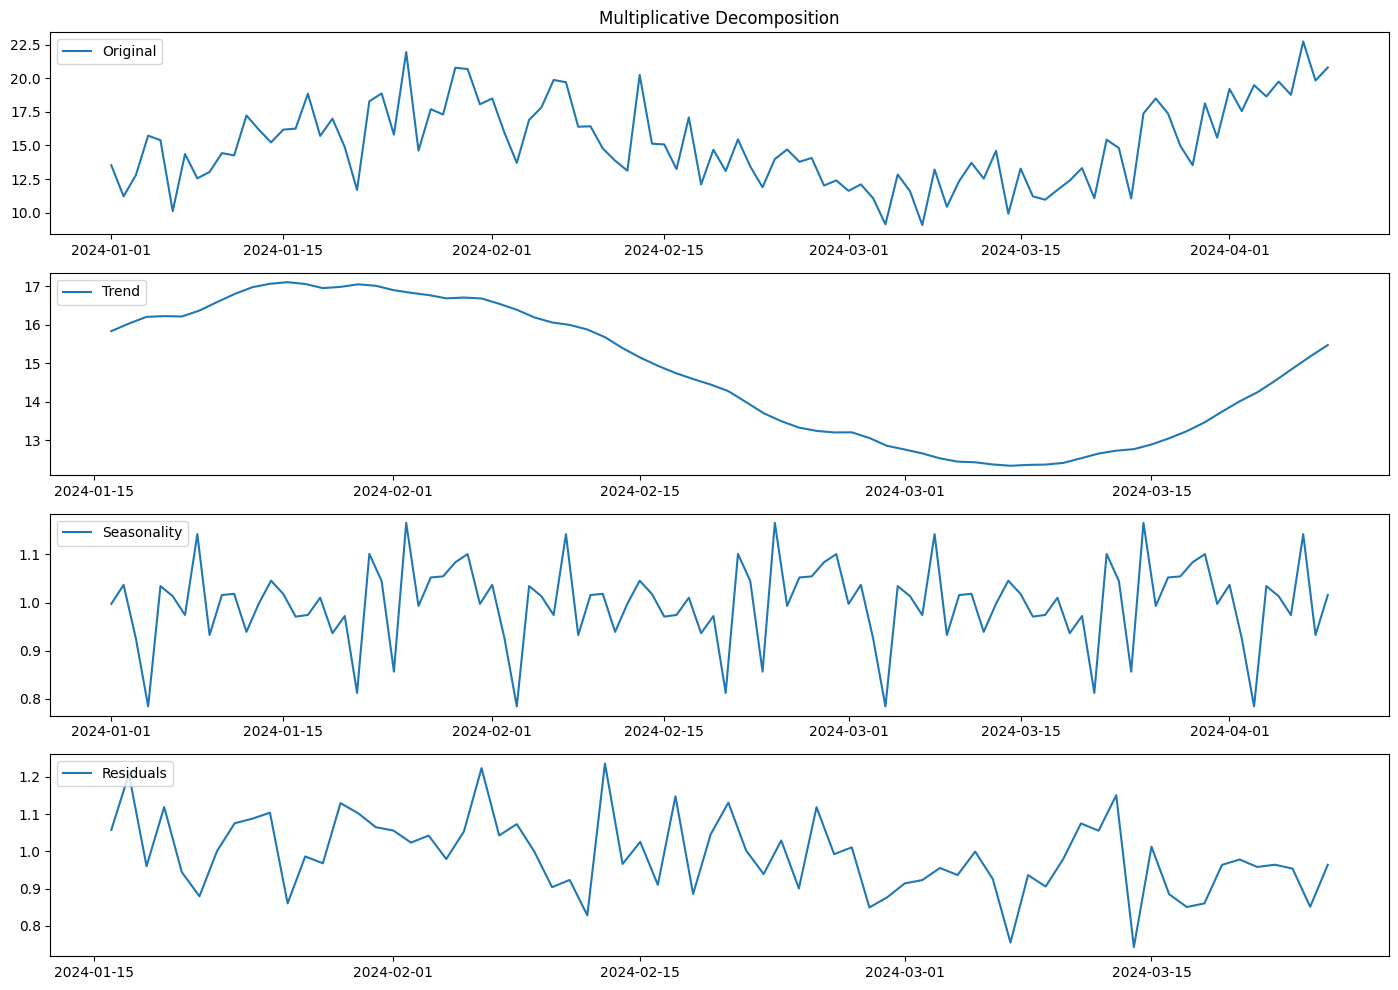

In [ ]:
# perform multiplicative decomposition
decomposition_mult = seasonal_decompose(df['value'], model='multiplicative', period=30)

# plot the components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df['value'], label='Original')
plt.legend(loc='upper left')
plt.title('Multiplicative Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_mult.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_mult.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition_mult.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Comparing Additive vs. Multiplicative Decomposition
It's useful to compare how the decompositions differ, especially if the data exhibits multiplicative seasonality or varying amplitude.

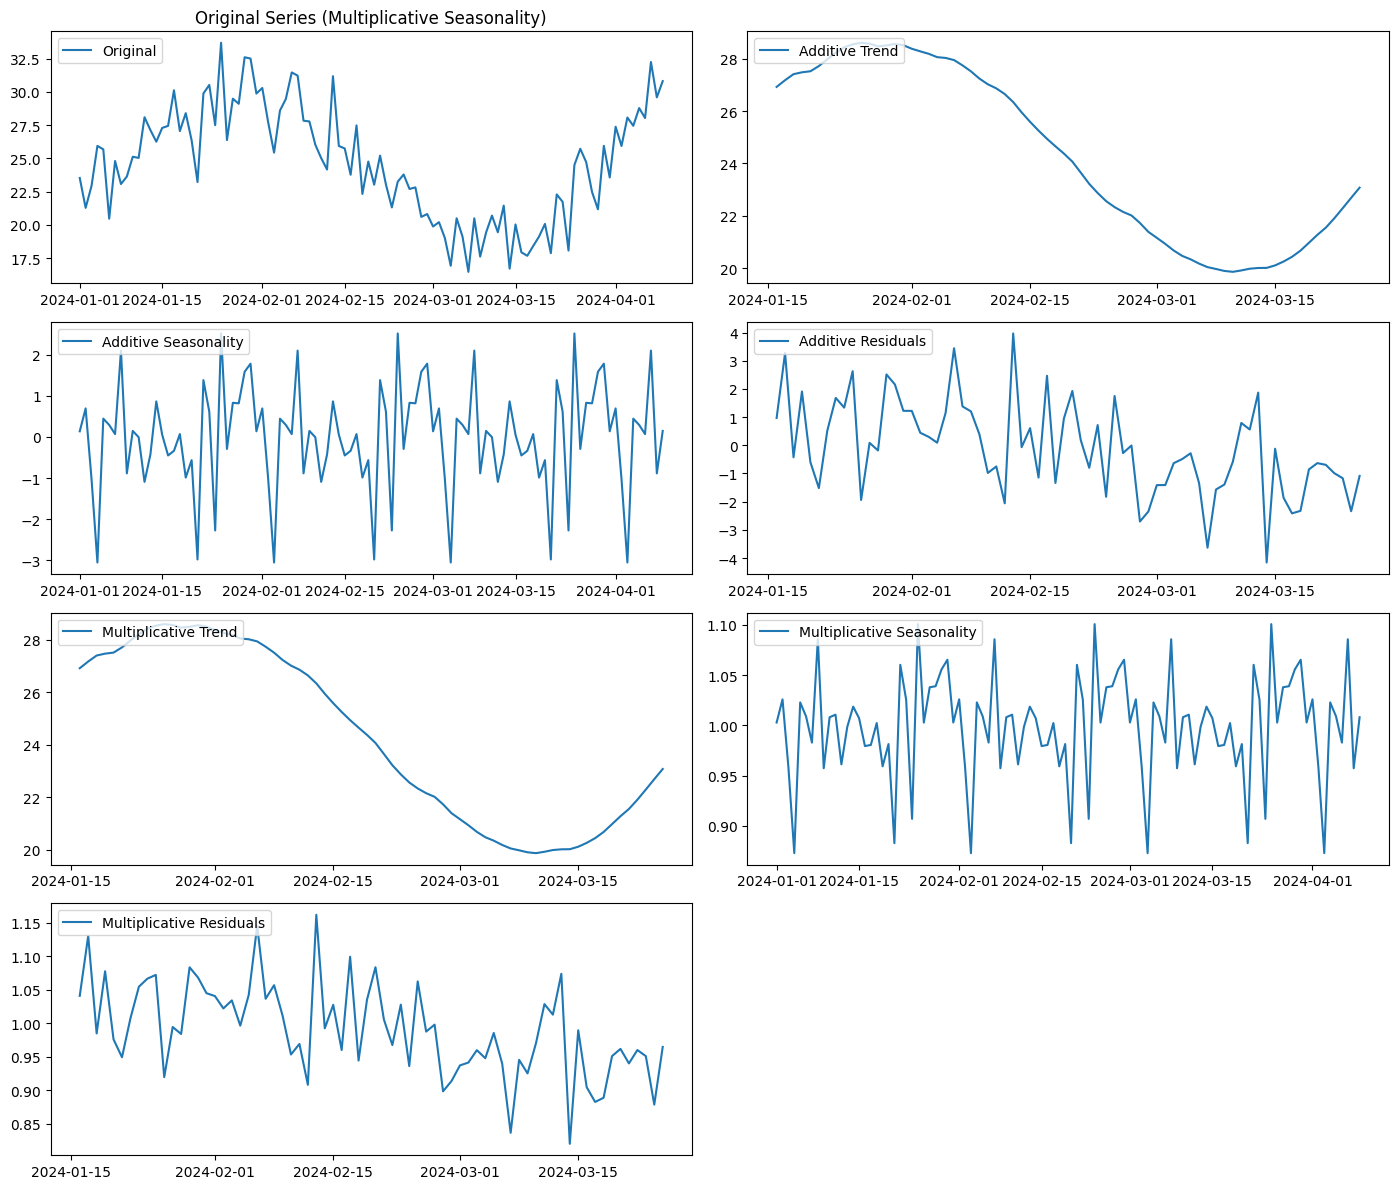

In [ ]:
# generate sample data with multiplicative seasonality
data_mult = (trend + 10) * (1 + 0.3 * np.sin(np.linspace(0, 2 * np.pi, 100))) + residual

# create DataFrame for multiplicative example
df_mult = pd.DataFrame(data_mult, index=dates, columns=['value'])

# perform decompositions
decomp_add = seasonal_decompose(df_mult['value'], model='additive', period=30)
decomp_mult = seasonal_decompose(df_mult['value'], model='multiplicative', period=30)

# plot the results for both decompositions
plt.figure(figsize=(14, 12))

plt.subplot(4, 2, 1)
plt.plot(df_mult['value'], label='Original')
plt.title('Original Series (Multiplicative Seasonality)')
plt.legend(loc='upper left')

plt.subplot(4, 2, 2)
plt.plot(decomp_add.trend, label='Additive Trend')
plt.legend(loc='upper left')

plt.subplot(4, 2, 3)
plt.plot(decomp_add.seasonal, label='Additive Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 2, 4)
plt.plot(decomp_add.resid, label='Additive Residuals')
plt.legend(loc='upper left')

plt.subplot(4, 2, 5)
plt.plot(decomp_mult.trend, label='Multiplicative Trend')
plt.legend(loc='upper left')

plt.subplot(4, 2, 6)
plt.plot(decomp_mult.seasonal, label='Multiplicative Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 2, 7)
plt.plot(decomp_mult.resid, label='Multiplicative Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## 2:00 pm: Practical session 5

### 11 classical time series forecasting methods in Python (article link [here](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/))

#### Autoregressive (AR) Model
The autoregression (AR) method predicts the subsequent value in a sequence using a linear combination of previous observations.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is best suited for single-variable time series that lack trend and seasonal components.

In [ ]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.94371452]


#### Moving Average (MA) Model
The Moving Average (MA) method models predict the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

It’s important to note that a Moving Average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

We can use the ARIMA class to create an MA model and set a zeroth-order AR model. We must specify the order of the MA model in the order argument.

In [ ]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[76.11132145]


#### Autoregressive Moving Average (ARMA)
The Autoregressive Moving Average (ARMA) method model predicts the next step in the sequence based on a linear combination of both past observations and past residual errors.

The method combines both Autoregression (AR) and Moving Average (MA) models.

To represent the model, the notation involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

In [ ]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[0.51758587]


#### Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average (ARIMA) method model predicts the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

The method integrates the principles of Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The ARIMA approach is optimal for single-variable time series that exhibit a trend but lack seasonal variations.

In [ ]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[100.03344464]


#### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence based on a linear blend of differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

SARIMA enhances the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

In [ ]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.521879]


#### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

In [ ]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

# contrived dataset
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]

# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(len(data1), len(data1), exog=[exog2])
print(yhat)

[100.73361021]


#### Vector Autoregression (VAR)

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
import numpy as np

# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)

# convert to NumPy array
data = np.array(data)

# fit model
model = VAR(data)
model_fit = model.fit()

# make prediction
# pass the last known observations as input for forecasting
lag_order = model_fit.k_ar  # Get the number of lags used in the model
input_data = data[-lag_order:]  # Get the last 'lag_order' observations
yhat = model_fit.forecast(input_data, steps=1)
print(yhat)

[[100.73392029 101.29778739]]


#### Vector Autoregression Moving-Average (VARMA)

The Vector Autoregression Moving-Average (VARMA) method models the upcoming value in multiple time series by utilising the ARMA model approach. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.

The method is suitable for multivariate time series without trend and seasonal components.

In [ ]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)

# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)

# make prediction
yhat = model_fit.forecast()
print(yhat)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[0.51657621 1.0080127 ]]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) extends the capabilities of the VARMA model which also includes the modelling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables, also called covariates and can be thought of as parallel input sequences that align with the time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [ ]:
# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]

# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)

# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[0.51634443 0.89321703]]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


#### Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

In [ ]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.58272811]


#### Holt Winter’s Exponential Smoothing (HWES)

In [ ]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.13467892]


### Link to [Prophet](https://facebook.github.io/prophet/)

In [ ]:
# install prophet library
!pip install prophet

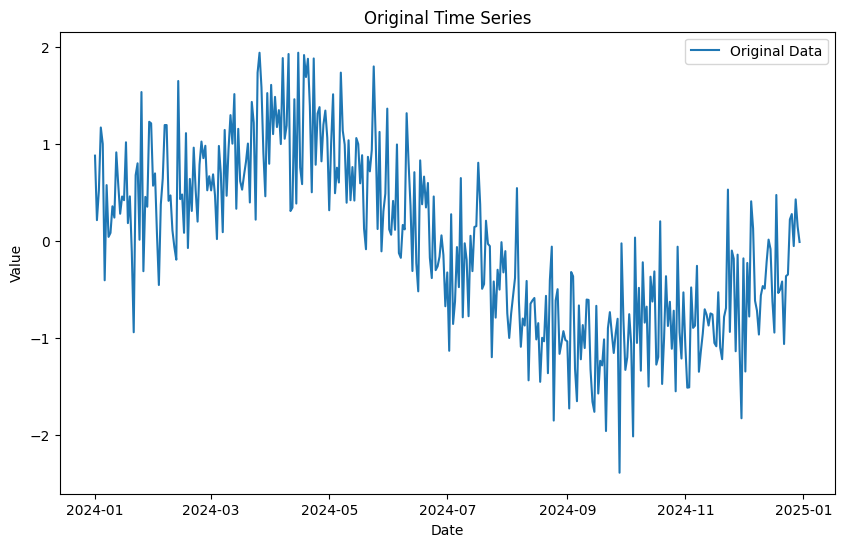

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# generate sample data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=365, freq='D')
data = np.sin(np.linspace(0, 2 * np.pi, 365)) + np.random.normal(scale=0.5, size=365)
df = pd.DataFrame({'ds': dates, 'y': data})

# plot original data
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Data')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# initialize and fit Prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjarvnpl1/b83lvywp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjarvnpl1/lry2rhth.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74658', 'data', 'file=/tmp/tmpjarvnpl1/b83lvywp.json', 'init=/tmp/tmpjarvnpl1/lry2rhth.json', 'output', 'file=/tmp/tmpjarvnpl1/prophet_modelg85nmgcp/prophet_model-20240923134849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:48:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


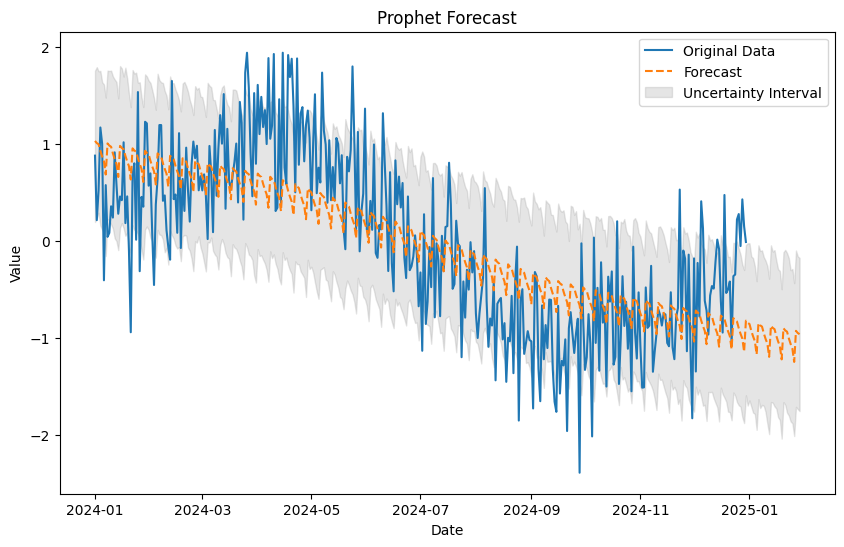

In [ ]:
# create a dataframe for future dates
future = model.make_future_dataframe(periods=30)

# make predictions
forecast = model.predict(future)

# plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# add custom seasonality
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjarvnpl1/yt6vuxm6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjarvnpl1/c1kqro9p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44544', 'data', 'file=/tmp/tmpjarvnpl1/yt6vuxm6.json', 'init=/tmp/tmpjarvnpl1/c1kqro9p.json', 'output', 'file=/tmp/tmpjarvnpl1/prophet_modelvxvz5249/prophet_model-20240923134915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjarvnpl1/4vsou1o_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjarvnpl1/dxs0y2xz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=791', 'data', 'file=/tmp/tmpjarvnpl1/4vsou1o_.json', 'init=/tmp/tmpjarvnpl1/dxs0y2xz.json', 'output', 'file=/tmp/tmpjarvnpl1/prophet_modelfi72xpc5/prophet_model-20240923134924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


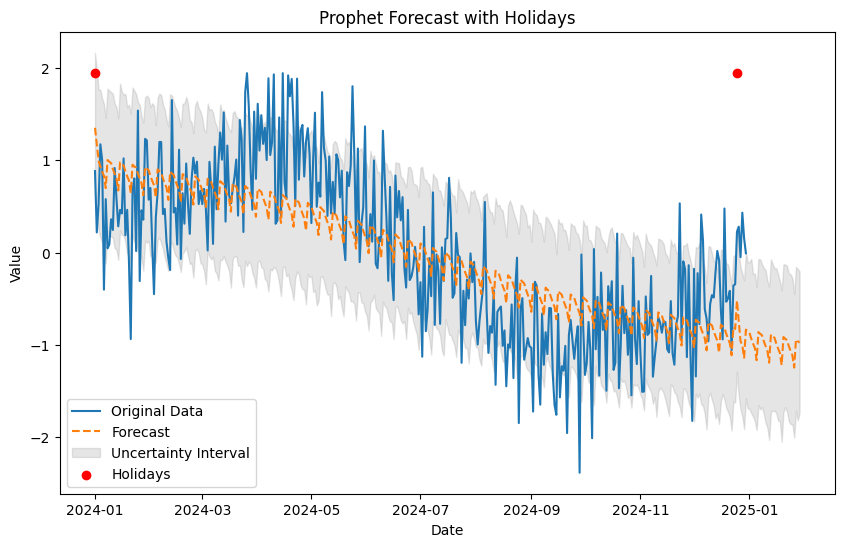

In [ ]:
# define holidays
holidays = pd.DataFrame({
    'holiday': 'holiday',
    'ds': pd.to_datetime(['2024-01-01', '2024-12-25']),
    'lower_window': 0,
    'upper_window': 1,
})

# add holidays to the model
model = Prophet(holidays=holidays)
model.fit(df)

# create future dataframe and make predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast with holidays
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.scatter(holidays['ds'], [df['y'].max()] * len(holidays), color='red', marker='o', label='Holidays')
plt.title('Prophet Forecast with Holidays')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# introduce missing data
df_missing = df.copy()
df_missing.loc[10:15, 'y'] = np.nan

# introduce outliers
df_missing.loc[50, 'y'] = 10

<ipython-input-36-bf0d0dcef34d>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  model.fit(df_missing.fillna(method='ffill').fillna(method='bfill'))
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjarvnpl1/ibj8qx7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjarvnpl1/nh3dkon1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48307', 'data', 'file=/tmp/tmpjarvnpl1/ibj8qx7p.json', 'init=/tmp/tmpjarvnpl1/nh3dkon1.json', 'output', 'file=/tmp/tmpjarvnpl1/prophet_model0zmu9vk5/prophet_model-20240923134946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100

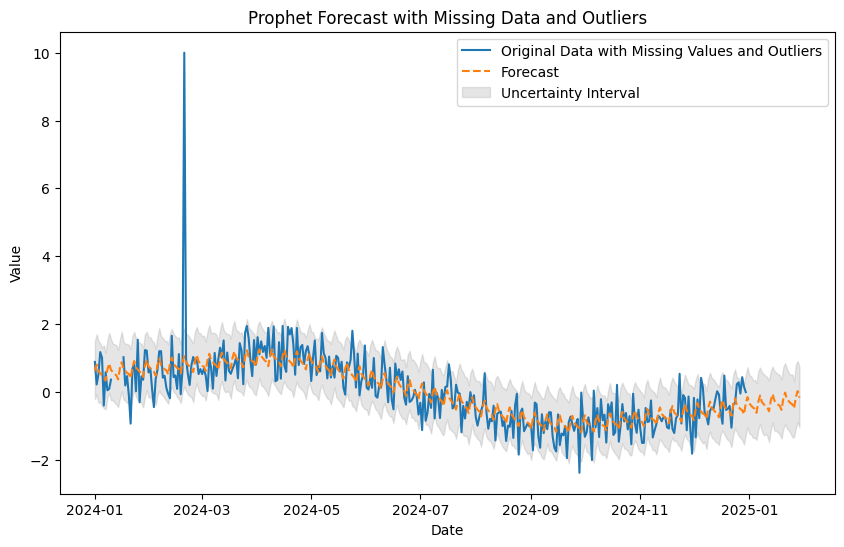

In [ ]:
# fit Prophet model with missing data
model = Prophet()
model.fit(df_missing.fillna(method='ffill').fillna(method='bfill'))

# make predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# plot
plt.figure(figsize=(10, 6))
plt.plot(df_missing['ds'], df_missing['y'], label='Original Data with Missing Values and Outliers')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.title('Prophet Forecast with Missing Data and Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

1.   Basic Prophet Forecasting: Easy to use and fits well with time series data exhibiting seasonality and trends.
2.   Custom Seasonality: Allows for the addition of custom seasonal effects.
3.   Holidays: Can incorporate holiday effects to adjust forecasts.
4.   Missing Data and Outliers: Prophet can handle missing data and outliers by filling in missing values or treating outliers as anomalies.

## 4:00 pm: Resampling and time series frequency conversion

#### Downsampling
Description: Downsampling involves reducing the frequency of your time series data. For instance, converting daily data to monthly data.

Example: Downsampling daily data to monthly data.

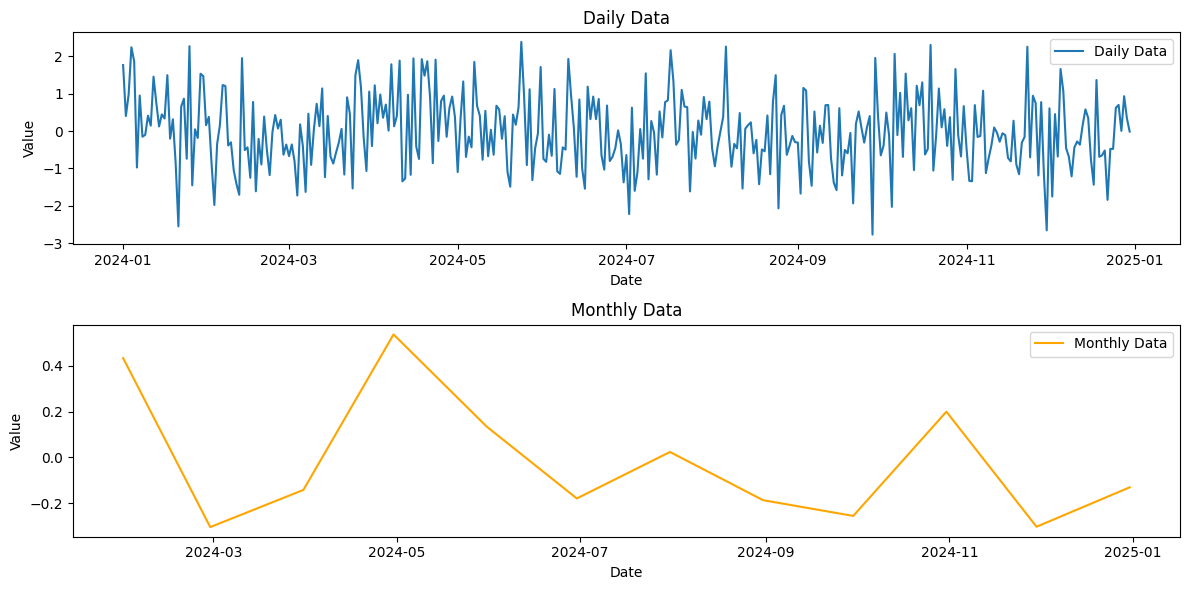

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# generate sample daily data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=365, freq='D')
data = np.random.randn(365)
df = pd.DataFrame({'date': dates, 'value': data})
df.set_index('date', inplace=True)

# downsample to monthly frequency
df_monthly = df.resample('M').mean()

# plot original and resampled data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['value'], label='Daily Data')
plt.title('Daily Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_monthly.index, df_monthly['value'], label='Monthly Data', color='orange')
plt.title('Monthly Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

Pros:

1.   Reduces the amount of data, which can simplify analysis.
2.   Useful for identifying long-term trends.

Cons:

1.   Loss of detail due to aggregation.
2.   May miss short-term variations.

#### Upsampling
Description: Upsampling involves increasing the frequency of your time series data. For example, converting monthly data to daily data.

Example: Upsampling monthly data to daily data and filling in missing values.

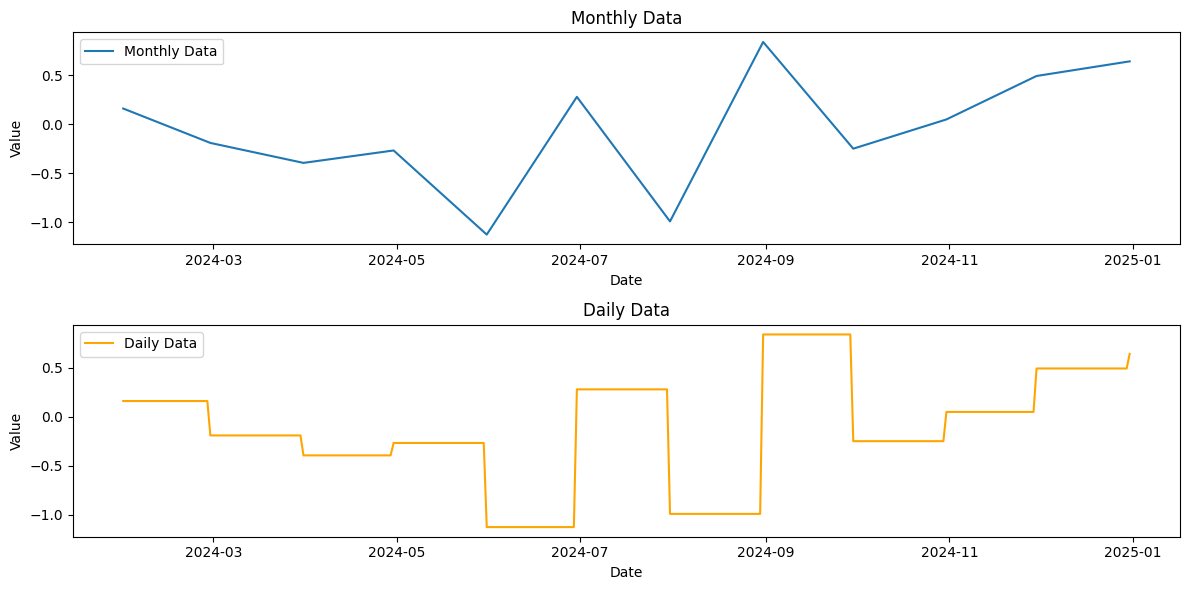

In [ ]:
# generate sample monthly data
monthly_dates = pd.date_range(start='2024-01-01', periods=12, freq='M')
monthly_data = np.random.randn(12)
df_monthly = pd.DataFrame({'date': monthly_dates, 'value': monthly_data})
df_monthly.set_index('date', inplace=True)

# upsample to daily frequency
df_daily = df_monthly.resample('D').ffill()  # Forward fill to handle missing values

# plot original and upsampled data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df_monthly.index, df_monthly['value'], label='Monthly Data')
plt.title('Monthly Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_daily.index, df_daily['value'], label='Daily Data', color='orange')
plt.title('Daily Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

Pros:

1.  Increases data granularity.
2.  Useful for detailed analysis and interpolating data.

Cons:

1.  May introduce artificial patterns.
2.  Requires careful handling of missing values.

####Resampling with Aggregation

Description: Aggregating data with a custom function during resampling. For example, calculating the sum or median during resampling.

Example: Resampling daily data to weekly data and calculating the weekly sum.

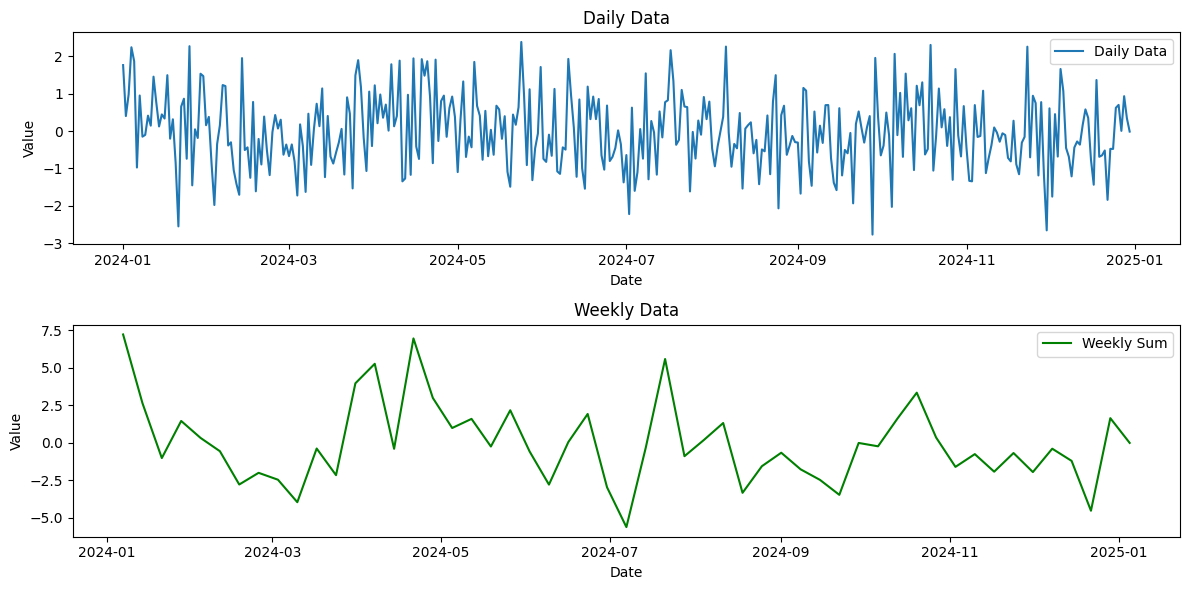

In [ ]:
# resample daily data to weekly data and calculate the sum
df_weekly = df.resample('W').sum()

# plot original and resampled data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['value'], label='Daily Data')
plt.title('Daily Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_weekly.index, df_weekly['value'], label='Weekly Sum', color='green')
plt.title('Weekly Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

Pros:

1.  Provides various aggregation options such as sum, mean, median, etc.
2.  Useful for understanding data patterns over different time periods.

Cons:

1.  Aggregation can mask fluctuations.
2.  Requires appropriate choice of aggregation method.

#### Frequency Conversion

Description: Converting time series data to a different frequency without resampling.

Example: Converting data from daily frequency to business day frequency.

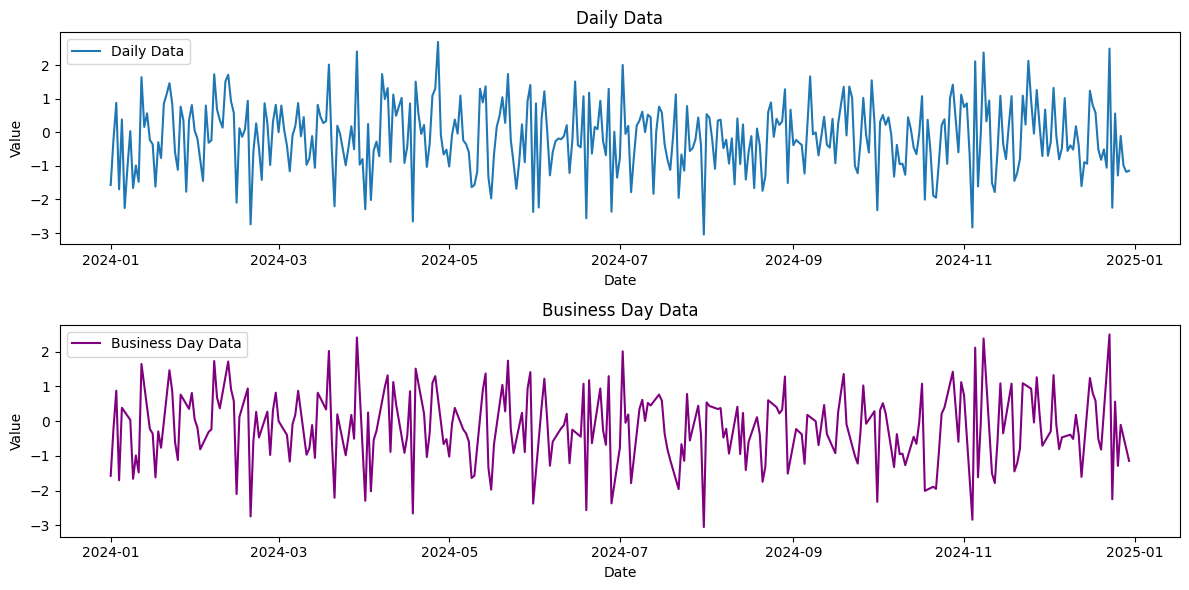

In [ ]:
# generate sample daily data
dates = pd.date_range(start='2024-01-01', periods=365, freq='D')
data = np.random.randn(365)
df = pd.DataFrame({'date': dates, 'value': data})
df.set_index('date', inplace=True)

# convert to business day frequency
df_business_day = df.asfreq('B', fill_value=np.nan)  # 'B' for business day frequency

# plot original and converted data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['value'], label='Daily Data')
plt.title('Daily Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_business_day.index, df_business_day['value'], label='Business Day Data', color='purple')
plt.title('Business Day Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

Pros:

1.  Allows for conversion to different frequencies based on needs.
2.  Can handle specific business-related requirements.

Cons:

1.  May result in missing values if frequency conversion does not align with original data.
2.  Requires appropriate filling strategy for missing data.